<a href="https://colab.research.google.com/github/DandyWahyu/Machine_Learning/blob/main/Jobsheet7/JS7Tugas_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 7 - Clustering
### Dandy Wahyu Syahputra
### 2141720002
### TI - 3A

## TUGAS PRAKTIKUM

#### K-Means

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [4]:
# Baca data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Mall_Customers.csv')

In [5]:
# Pilih fitur yang relevan
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [6]:
# Standarisasi fitur
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
# Percobaan untuk menemukan jumlah cluster yang optimal
cluster_range = range(2, 11)
silhouette_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_features, labels)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

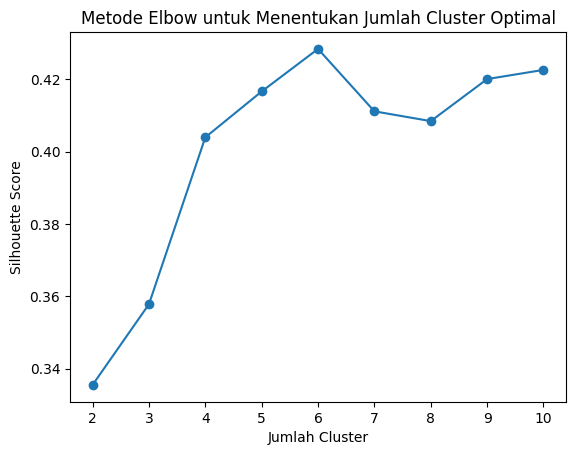

In [8]:
# Plot metode elbow
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.show()

In [9]:
# Pilih jumlah cluster yang optimal
num_clusters = 6

In [10]:
# Inisialisasi dan latih model K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


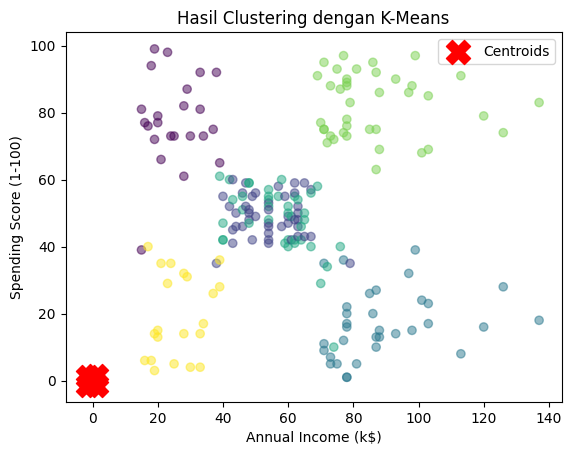

In [11]:
# Visualisasi hasil clustering
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hasil Clustering dengan K-Means')
plt.legend()
plt.show()

> Saya sudah menggunakan standarisasi atau normalisasi pada fitur sebelum melatih model K-Means, sehingga pusat klaster yang dihasilkan akan mengikuti skala yang diterapkan pada data. Standarisasi biasanya menghasilkan fitur dengan mean 0 dan deviasi standar 1. Oleh karena itu, pusat klaster yang ditemukan oleh algoritma juga akan cenderung berada di sekitar 0.

In [12]:
# Tampilkan dataframe dengan kolom Cluster
print(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])

     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     19                  15                      39        0
1     21                  15                      81        0
2     20                  16                       6        5
3     23                  16                      77        0
4     31                  17                      40        5
..   ...                 ...                     ...      ...
195   35                 120                      79        4
196   45                 126                      28        2
197   32                 126                      74        4
198   32                 137                      18        2
199   30                 137                      83        4

[200 rows x 4 columns]


### SOM with image

In [14]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=fed330171d8884d547d31419433800e552b9ab8694221d757dbcc2dd0b2b691b
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from PIL import Image

In [16]:
# Fungsi untuk mengonversi citra menjadi dataset yang sesuai untuk SOM
def create_dataset(image):
    width, height = image.size
    pixels = np.array(image.getdata())
    return pixels / 255.0

In [23]:
# Load citra
sayuran = "/content/drive/MyDrive/Colab Notebooks/dataset/sayuran.jpg"
original_image = Image.open(sayuran)
img_data = np.asarray(original_image)
img_data = img_data / 255.0

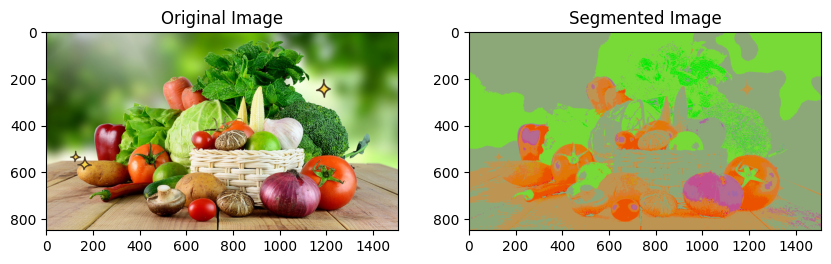

In [26]:
# Reshape image
flat_img_data = img_data.reshape(-1, 3)

# Membuat Self-Organizing Map (SOM)
som_dimension = 10
som = MiniSom(som_dimension, som_dimension, 3, sigma=0.3, learning_rate=0.5)
som.train_random(flat_img_data, 100)

# Segmentasi gambar menggunakan SOM
segmented_img_data = np.zeros_like(flat_img_data)
for i, x in enumerate(flat_img_data):
    winner = som.winner(x)
    weights = som.get_weights()[winner[0], winner[1]]
    segmented_img_data[i] = weights

# Reshape gambar yang telah tersegmentasi
segmented_img = segmented_img_data.reshape(img_data.shape)

# Display original dan gambar tersegmentasi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title("Segmented Image")
plt.show()